# Exponential smoothing of sales data

Exponential smoothing is a statistical method used for forecasting time series data. It works by giving more weight to more recent observations in the data, and less weight to older observations. The idea is that more recent observations are more relevant for forecasting future values than older observations, as they are more reflective of current trends and patterns in the data.

The method is based on calculating a weighted average of the previous data, where most recent data is given a higher weight and the weight decreases exponentially the further back in time you go. It is particularly useful for short-term forecasting and for datasets with low to moderate levels of noise. 

## Import required libraries and modules

In [60]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Import dataset and run initial data inspection

In [61]:
df = pd.read_csv(r"C:\Users\pjhop\OneDrive\Documents\Programming & Coding\Python\Projects\Datasets\Sales_data.csv")
df.head()

,Time period,Sales Amount
0,Jan-21,1000
1,Feb-21,1200
2,Mar-21,1300
3,Apr-21,1250
4,May-21,1400


In [62]:
df['Time period'] = pd.to_datetime(df['Time period'], format='%b-%y')
df.set_index('Time period', inplace=True)

In [63]:
df.head(12)

,Sales Amount
Time period,
2021-01-01,1000
2021-02-01,1200
2021-03-01,1300
2021-04-01,1250
2021-05-01,1400
2021-06-01,1500
2021-07-01,1700
2021-08-01,1800
2021-09-01,2000


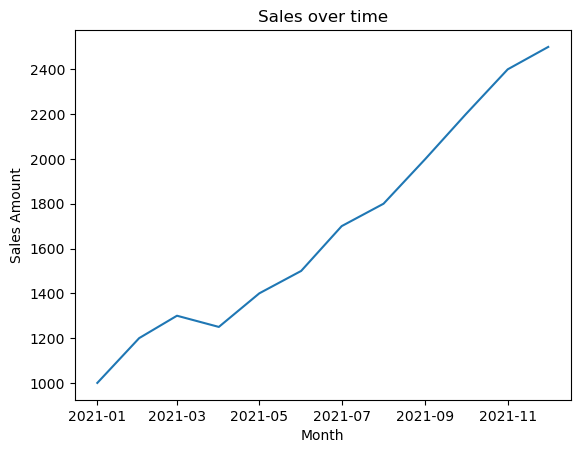

<Figure size 640x480 with 0 Axes>

In [64]:
plt.plot(df['Sales Amount'])

plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Sales over time')

plt.show()
plt.clf()

Above we can see a plot of how the sales amount has changed over time, noting a slight positive trend over the 12-month duration.

## Model fit

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define parameters
alpha = 0.2
beta = 0.1

model = ExponentialSmoothing(df['Sales Amount'], trend='add', initialization_method="estimated",
                             initial_level=None, initial_trend=None,  seasonal=None, freq='MS')
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta)

In the exponential smoothing class, there are a large number of parameters which need to be explained:
* `trend` defines the type of trend in the model, this can be additive or multiplicative.
* `seasonal` refers to the type of seasonal component, additive or multiplicative.
* `initialization_method` refers to the initial setting of parameters of the model before fitting the data, for which there are several different methods. The parameter can take one of four possible values: None, 'estimated', 'heuristic', and 'known'.
* `freq` refers to the frequency of the time series.

When fitting the model, we have two parameters:
* `smoothing_level` is the amount of weight given to the most recent observation in the data, a higher value makes the forecast more responsive to changes in the data and vice versa. 
* `smoothing_trend` is the amount of weight given to the trend in the data, when more weight is given the data becomes more responsive to changes in the trend and vice versa. 

The optimal values of alpha and beta depend on the characteristics of the data being forecasted and are usually chosen using techniques such as grid search or maximum likelihood estimation.

## Model forecast and comparison

The line of code below forecasts the sales amount for the next 12 time periods, which in our case in the next 12 months. 

In [ ]:
forecast = model_fit.forecast(steps=12)

In [68]:
print(forecast)

2022-01-01    2573.149016
2022-02-01    2709.659228
2022-03-01    2846.169440
2022-04-01    2982.679652
2022-05-01    3119.189864
2022-06-01    3255.700077
2022-07-01    3392.210289
2022-08-01    3528.720501
2022-09-01    3665.230713
2022-10-01    3801.740926
2022-11-01    3938.251138
2022-12-01    4074.761350
Freq: MS, dtype: float64


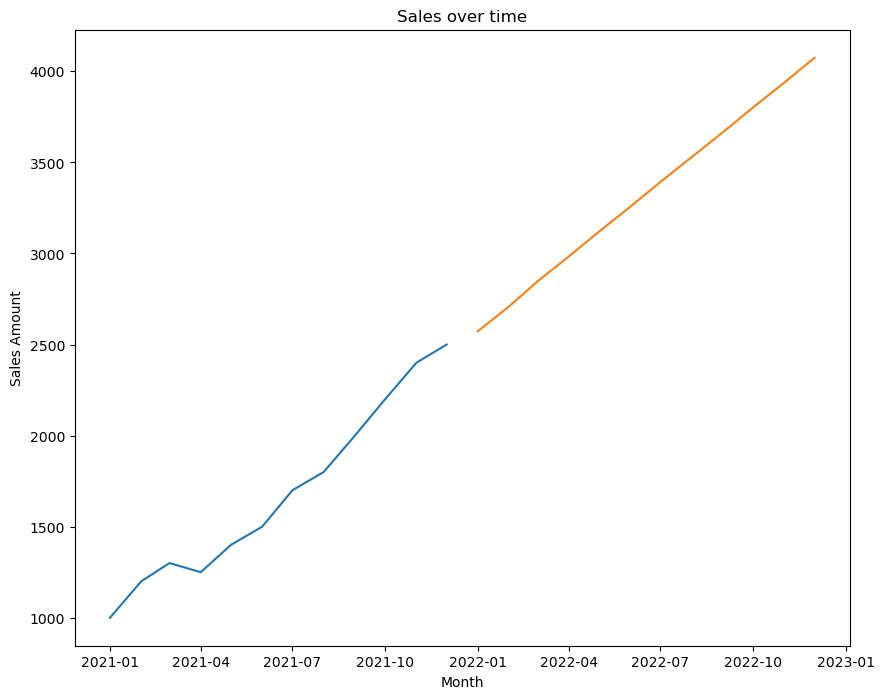

<Figure size 640x480 with 0 Axes>

In [72]:
plt.figure(figsize=(10, 8))

plt.plot(df['Sales Amount'])
plt.plot(forecast)

plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Sales over time')

plt.show()
plt.clf()

When we compare our forecast to our initial dataset, we can see how the predictions compare to our initial dataset. Given, we did not do a training and test dataset, we cannot evaluate this model. 